# Guide to Wonky


In [2]:
%matplotlib inline
import wonky

## Choose a chemical reaction system and initial conditions

In this example the CRN is on a square lattice. It is easy to plug in different graphs

In principle any reaction network can be simulated although I have only tested simply reaction networks

In [2]:
rsys =  wonky.reaction.reaction_system([wonky.reaction("A", "A+A", 0.5),
                                        wonky.reaction("A", "0", 0.5)])
net = wonky.crn(rsys, (9,2), ICs=[1])

## Sample from the CRN and view statistics

Waiting times are not handled in this simple example but it is easy to fold time onto a log scale for example and use conditional stat writing

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


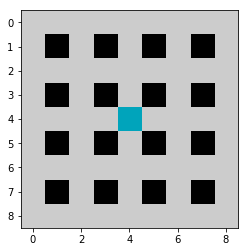

In [11]:
net.sample(display=True,params={"name":"./sample_data/exp/01"})
net.stats.observable(obs=1)

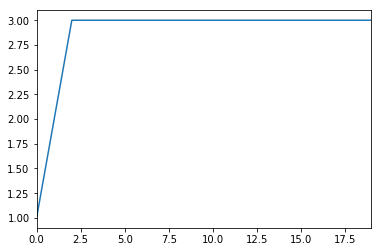

In [4]:
net.stats.observable(obs=1)[1].plot()

## Experiments

In [5]:
params = {
    #in practice N would be a different type of parameter i.e. we would sample(N, params)
    "N" : range(10),
    "P" : ["A", "B", "C"],
    "A" : [1]
}
wonky.utils.get_paramter_space(params)

,A,N,P,name
0,1,0,A,00
1,1,0,B,01
2,1,0,C,02
3,1,1,A,03
4,1,1,B,04
5,1,1,C,05
6,1,2,A,06
7,1,2,B,07
8,1,2,C,08
9,1,3,A,09


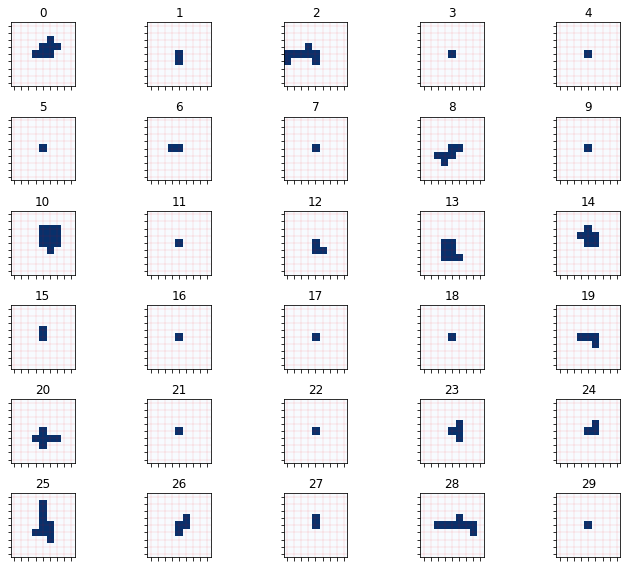

In [6]:
params = {
    #for this sample, range must be serializable
    "N" : list(range(10)),
    "P" : ["A", "B", "C"],
    "A" : [1]
}
images = list(net.run_experiment(params,yield_trace=True))
wonky.plotting.plot_many(images, (6,5)) 

### Compile all chunks

In [7]:
my_data  = wonky.utils.compile_statistics(params=params)
my_data[::5]

,A,N,P,index,0,1,2,3,4,5,6,7,8
name,,,,,,,,,,,,,
00,1,0,A,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00,1,0,A,5,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0
00,1,0,A,10,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0
00,1,0,A,15,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0
01,1,0,B,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01,1,0,B,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,1,0,B,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,1,0,B,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,1,0,C,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
my_data[my_data.P == "C"].groupby(["index"]).mean()

,A,N,0,1,2,3,4,5,6,7,8
index,,,,,,,,,,,
0,1.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,4.5,1.0,1.2,2.4,4.8,9.6,19.2,38.4,76.8,153.6
2,1.0,4.5,1.0,1.4,3.8,11.0,32.6,97.4,291.8,875.0,2624.6
3,1.0,4.5,1.0,1.2,2.4,4.8,9.6,19.2,38.4,76.8,153.6
4,1.0,4.5,1.0,1.4,3.8,11.0,32.6,97.4,291.8,875.0,2624.6
5,1.0,4.5,1.0,1.6,4.8,16.0,57.6,217.6,844.8,3328.0,13209.6
6,1.0,4.5,1.0,1.8,7.0,30.6,141.4,673.8,3271.0,16062.6,79437.4
7,1.0,4.5,1.0,1.8,6.8,31.2,161.6,892.8,5100.8,29683.2,174617.6
8,1.0,4.5,1.0,1.6,5.4,20.8,87.0,385.6,1781.4,8468.8,41031.0
